Initial Weights + bias :  (-0.22160296072143962, -0.31682689549280557, -0.3349652813444701)
OR gate  : Mean Square error at epoch - 1 : 2.060112111538815
OR gate  : Mean Square error at epoch - 2 : 1.0455744215013432
OR gate  : Mean Square error at epoch - 3 : 0.6396220661006918
OR gate  : Mean Square error at epoch - 4 : 0.47410526856176477
OR gate  : Mean Square error at epoch - 5 : 0.40473776567010644


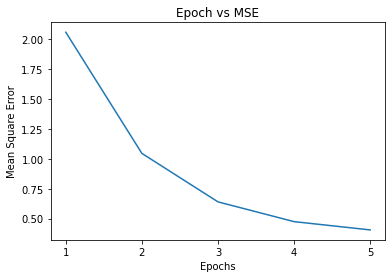

Initial Weights + bias :  (0.45760507389242494, -0.7663910509093311, 0.32160050348526964)
And gate  : Mean Square error at epoch - 1 : 2.3553360401366845
And gate  : Mean Square error at epoch - 2 : 1.0856052907672953
And gate  : Mean Square error at epoch - 3 : 0.6080315865733059
And gate  : Mean Square error at epoch - 4 : 0.43225817177441395
And gate  : Mean Square error at epoch - 5 : 0.3699938850812231


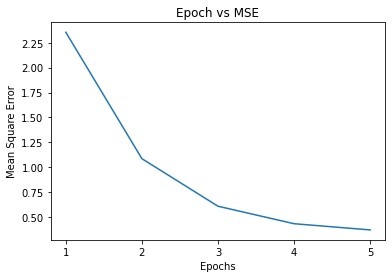

Initial Weights + bias :  (-0.47893500616532775, 1.5327606745872664, -0.05975892103676031)
XOR gate  : Mean Square error at epoch - 1 : 3.62229324556761
XOR gate  : Mean Square error at epoch - 2 : 2.1642351071477304
XOR gate  : Mean Square error at epoch - 3 : 1.631581170378312
XOR gate  : Mean Square error at epoch - 4 : 1.4456465095457496
XOR gate  : Mean Square error at epoch - 5 : 1.3864809058944683


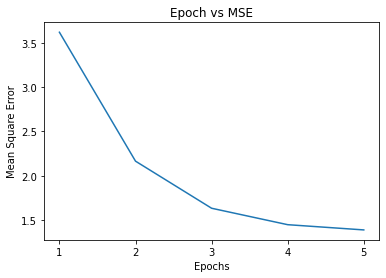

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def train_data(data): 
  X = data.drop(['label'], axis=1)
  y = data['label']
  return X, y
def train(s,X, y):
  w1, w2, b = tuple(np.random.normal(size=3))
  print("Initial Weights + bias : ", (w1, w2, b))
  epochs = 5
  alpha = 0.1
  # delta learning
  MSE = []
  for i in range(epochs):
      error = []
      for i in range(len(X)):
          y_pred = w1*X.iloc[i, 0] + w2*X.iloc[i, 1] + b
          t = y[i]
          diff = t - y_pred
          err = diff**2
          error.append(err)

          delta_w1 = diff*X.iloc[i, 0]
          delta_w2 = diff*X.iloc[i, 1]
          delta_b = diff

          w1 = w1 + alpha*delta_w1
          w2 = w2 + alpha*delta_w2
          b = b + alpha*delta_b
      MSE.append(np.array(error).mean())
  for i in range(epochs):
      print(s," : Mean Square error at epoch -", str(i+1)+" :", MSE[i])
  plt.plot(np.array(MSE))
  plt.xticks(np.arange(epochs), [str(i+1) for i in range(epochs)])
  plt.xlabel('Epochs')
  plt.ylabel("Mean Square Error")
  plt.title("Epoch vs MSE")
  plt.show()

or_arr = np.array([[-1, -1, -1],[-1, 1, 1],[1, -1, 1],[1, 1, 1]])
and_arr = np.array([[-1, -1, -1],[-1, 1, -1],[1, -1, -1],[1, 1, 1]])
xor_arr = np.array([[-1, -1, -1],[-1, 1, 1],[1, -1, 1],[1, 1, -1]])
df_or = pd.DataFrame(or_arr, columns = ['X1', 'X2', 'label'])
df_and = pd.DataFrame(and_arr, columns = ['X1', 'X2', 'label'])
df_xor = pd.DataFrame(xor_arr, columns = ['X1', 'X2', 'label'])
X, y = train_data(df_or)
train("OR gate",X, y)
X, y = train_data(df_and)
train("And gate",X, y)
X, y = train_data(df_xor)
train("XOR gate",X, y)